In [1]:
from torchvision import datasets, transforms
import torch
import matplotlib.pyplot as plt
import torch.nn as nn
import torchvision
import copy

In [2]:
train = datasets.FashionMNIST('', train = True, download = True, 
                              transform = transforms.Compose([transforms.ToTensor()])
                             )
test = datasets.FashionMNIST('', train = False, download = True, 
                              transform = transforms.Compose([transforms.ToTensor()])
                             )

In [3]:
train_loader = torch.utils.data.DataLoader(train, batch_size = 16, shuffle = True)
test_loader = torch.utils.data.DataLoader(test, batch_size = 16, shuffle = False)



In [4]:
for i, (images, labels) in enumerate(train_loader):
    print(i)
    print(images.shape)
    print(labels.shape)
    break

0
torch.Size([16, 1, 28, 28])
torch.Size([16])


In [5]:
image_grid = torchvision.utils.make_grid(images)
image_grid.shape

torch.Size([3, 62, 242])

- torch.squeeze: Returns a tensor with all the dimensions of input of size 1 removed.

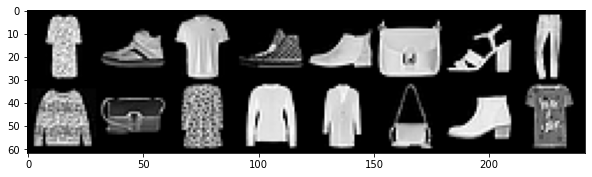

In [6]:
plt.figure(figsize = (10,10))
plt.imshow(image_grid.permute(1,2,0));

- The Fashion-MNIST dataset consists of grascale images. If you look at the implementation detail of torchvision.utils.make_grid, single-channel images get their channel copied three times:

- if tensor.dim() == 4 and tensor.size(1) == 1:  # single-channel images then 
    tensor = torch.cat((tensor, tensor, tensor), 1)
    
- torch.cat concatenates the given sequence of seq tensors in the given dimension. Here they are concatenated along channel dimension as (B,C,H,W)

## Simple Autoencoder Architecture

- The first argument signifies that super() searches for the method in the immediate parent of the class (first argument)
- The use of self as the second parameter provides the context of the current object to super() for the requested method to act upon.

#### Example:

In [7]:
class Square():
    def __init__(self, side):
        print('Inside init of Square')
        self.side = side
  
    def area(self):
        print('Inside area of Square')
        return self.side * self.side
    
class SquarePrism(Square):
    def __init__(self, side, height):
        self.side = side
        self.height = height
  
    def face_area(self):
        base_area = super().area()
        lateral_area = self.side * self.height
        return base_area, lateral_area
  
    def area(self):
        print('Inside area of Square Prism')
        base_area = super().area()
        print('base area: ',base_area )
        lateral_area = self.side * self.height
        print('lateral area: ',lateral_area )
        return 2 * base_area + 4 * lateral_area
    
class Cube(SquarePrism):
    def __init__(self, side):
        super().__init__(side = side, height = side)
  
    def face_area(self):
        return super(SquarePrism, self).area()
  
    def area(self):
        return super().area()

In [8]:
c = Cube(5)

In [9]:
c.face_area()

Inside area of Square


25

In [10]:
c.area()

Inside area of Square Prism
Inside area of Square
base area:  25
lateral area:  25


150

## Autoencoder class

In [11]:
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(nn.Linear(784,100),
                                     nn.ReLU(),
                                     nn.Linear(100, 100),
                                     nn.ReLU()
        
        )
        self.decoder = nn.Sequential(nn.Linear(100,100),
                                     nn.ReLU(),
                                     nn.Linear(100, 784),
                                     nn.ReLU()
        
        )
        
    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

In [12]:
model = Autoencoder()
model

Autoencoder(
  (encoder): Sequential(
    (0): Linear(in_features=784, out_features=100, bias=True)
    (1): ReLU()
    (2): Linear(in_features=100, out_features=100, bias=True)
    (3): ReLU()
  )
  (decoder): Sequential(
    (0): Linear(in_features=100, out_features=100, bias=True)
    (1): ReLU()
    (2): Linear(in_features=100, out_features=784, bias=True)
    (3): ReLU()
  )
)

In [13]:
init_weights = copy.deepcopy(model.encoder[0].weight.data)
init_weights

tensor([[ 0.0176, -0.0212, -0.0181,  ...,  0.0161, -0.0337, -0.0344],
        [-0.0140, -0.0218,  0.0208,  ..., -0.0034, -0.0033, -0.0246],
        [-0.0278,  0.0270,  0.0229,  ..., -0.0130, -0.0232,  0.0061],
        ...,
        [ 0.0263,  0.0025,  0.0132,  ..., -0.0207, -0.0126,  0.0313],
        [ 0.0243,  0.0224,  0.0104,  ...,  0.0091, -0.0185,  0.0198],
        [-0.0043, -0.0172, -0.0103,  ...,  0.0322,  0.0277,  0.0026]])

In [14]:
epochs = 30
optim = torch.optim.SGD(params = model.parameters(), lr = 0.5)
loss = nn.MSELoss()

## Training Model

In [15]:
epoch_loss = []
epoch_number = []
for i in range(epochs):
    print(i, end =', ')
    for j, (images, labels) in enumerate(train_loader):
        optim.zero_grad()
        predictions = model(images.view(-1,28*28))
        loss_val = loss(predictions, images.view(-1,28*28))
        loss_val.backward()
        optim.step()
    epoch_loss.append(loss_val.data)
    epoch_number.append(i)
    
        
    

0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 

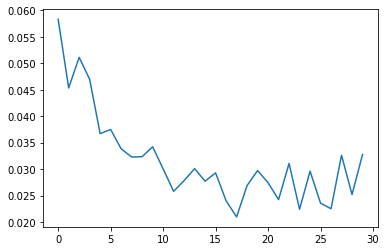

In [16]:
plt.figure(figsize = (6,4))
plt.plot(epoch_number, epoch_loss);

## Model output visualization

In [17]:
for index, (testimage, testlabel) in enumerate(test_loader):
    imgs = testimage
    break

In [18]:
img = imgs[0]
img.shape

torch.Size([1, 28, 28])

In [19]:
pred_test = model(img.view(-1,28*28))
pred_test.shape

torch.Size([1, 784])

In [20]:
pred_test = pred_test.view(-1,28,28)
pred_test.shape

torch.Size([1, 28, 28])

In [21]:
pred_test_arr = pred_test.detach().numpy()
pred_test_arr.shape

(1, 28, 28)

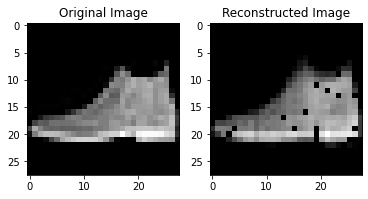

In [22]:
fig = plt.figure()
plot=fig.add_subplot(1,2,1)
plot.set_title('Original Image')
imgplot = plt.imshow(img.detach().numpy()[0],cmap='gray')

plot=fig.add_subplot(1,2,2)
plot.set_title('Reconstructed Image')
imgplot = plt.imshow(pred_test_arr[0],cmap='gray')

### Training for classification

-  *is used to unpack the list

In [23]:
new_classifier = nn.Sequential(*list(model.children())[:-1])
new_classifier.add_module('classifier', nn.Sequential(nn.Linear(100,10)))
new_classifier

Sequential(
  (0): Sequential(
    (0): Linear(in_features=784, out_features=100, bias=True)
    (1): ReLU()
    (2): Linear(in_features=100, out_features=100, bias=True)
    (3): ReLU()
  )
  (classifier): Sequential(
    (0): Linear(in_features=100, out_features=10, bias=True)
  )
)

In [24]:
epochs = 15
optim = torch.optim.SGD(params = model.parameters(), lr = 0.5)
loss = nn.CrossEntropyLoss()

In [25]:
epoch_loss = []
epoch_number = []
for i in range(epochs):
    print(i, end =', ')
    for j, (images, labels) in enumerate(train_loader):
        optim.zero_grad()
        predictions = new_classifier(images.view(-1,28*28))
        loss_val = loss(predictions, labels)
        loss_val.backward()
        optim.step()
    epoch_loss.append(loss_val.data)
    epoch_number.append(i)
    
        
    

0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 

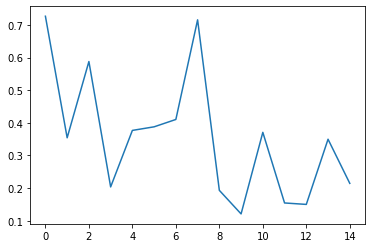

In [26]:
plt.figure(figsize = (6,4))
plt.plot(epoch_number, epoch_loss);

### Accuracy on test data

In [27]:
total_test = 0
correct_test = 0
for index, (testimage, testlabel) in enumerate(test_loader):
    new_classifier.eval()

    with torch.no_grad():
        out_data = new_classifier(testimage.view(-1,28*28))
        _, test_prediction = torch.max(out_data.data,1)
        correct_num = (testlabel == test_prediction).sum()
        total_test = total_test + testlabel.size(0)
        correct_test = correct_test + correct_num
        
        
accuracy = correct_test/total_test
accuracy

tensor(0.8810)

In [34]:
accuracy.item()

0.8809999823570251

## The End